<a href="https://colab.research.google.com/github/visheshtechie/NLP/blob/master/Practicals/Practical2_20191220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries and Data
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
#Setting english stopwords
stop_words = set(stopwords.words('english'))
#Reading Data
data = pd.read_json("http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz",lines=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Creating a dataframe with only reviewText column
df=data.filter(['reviewText'])

In [3]:
df.head()

,reviewText
0,"I bought my first HP12C in about 1984 or so, a..."
1,WHY THIS BELATED REVIEW? I feel very obliged t...
2,I have an HP 48GX that has been kicking for mo...
3,I've started doing more finance stuff recently...
4,For simple calculations and discounted cash fl...


In [0]:
#Function to remove punctuation from the string
def rpunc(text):
  seps='''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for sep in seps:
    text=text.replace(sep,"")
  return text

In [0]:
#Function to tokenize the string
def tokenize(text):
  text=text.lower()
  text=rpunc(text)
  temp=word_tokenize(text)
  tokens = [w for w in temp if not w in stop_words] 
  return tokens

In [6]:
print(tokenize("w,a.s!s?u/p'dawg How are you doinggg XD"))

['wassupdawg', 'doinggg', 'xd']


In [0]:
#Creating a column in dataframe that displays tokenized form of reviewText column
df['Tokens']=df.reviewText.apply(tokenize)

In [8]:
df.head()

,reviewText,Tokens
0,"I bought my first HP12C in about 1984 or so, a...","[bought, first, hp12c, 1984, served, faithfull..."
1,WHY THIS BELATED REVIEW? I feel very obliged t...,"[belated, review, feel, obliged, share, views,..."
2,I have an HP 48GX that has been kicking for mo...,"[hp, 48gx, kicking, twenty, years, hp, 11, 25,..."
3,I've started doing more finance stuff recently...,"[ive, started, finance, stuff, recently, went,..."
4,For simple calculations and discounted cash fl...,"[simple, calculations, discounted, cash, flows..."


In [9]:
#Creating a list that will hold Tokens from the whole reviewText data
MyWords = []
for i in range(0,df.shape[0]):
  for j in df.Tokens[i]:
    MyWords.append(j)
    
#Number of tokens in reviewText
len(MyWords)

4005778

In [0]:
#Importing libraries for WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [0]:
#Converting all our reviewText tokens into a string format for WordCloud
WCstring=(" ").join(MyWords)

#Creating the WordCloud
wordcloud = WordCloud().generate(WCstring)

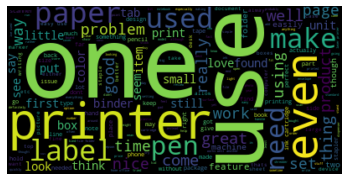

In [12]:
#Seeing the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
#Function to derive cosine similarity between two sentences given as input parameters
def cos_sim(s1,s2):
  s1=set(s1)
  s2=set(s2)
  l1,l2=[],[]
  rvector = s1.union(s2)  
  for w in rvector: 
      if w in s1: l1.append(1) # create a vector 
      else: l1.append(0) 
      if w in s2: l2.append(1) 
      else: l2.append(0) 
  c = 0
    
  # cosine formula  
  for i in range(len(rvector)): 
          c+= l1[i]*l2[i] 
  try:
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
  except:
    cosine = 0
  return cosine


In [14]:
cos_sim(df.Tokens[0],df.Tokens[1])

0.10426163399217193

In [0]:
#Creating a list which will hold all similarity scores for reviews in adjacent rows
scores=[]
for i in range(0,(df.shape[0]-1)):
  scores.append(cos_sim(df.Tokens[i],df.Tokens[i+1]))

In [16]:
#Comparing number of rows in dataframe to number of elements in our list
print(df.shape[0])
print(len(scores))

53258
53257


In [0]:
#Adding another element in scores list to make rows and elements equal
scores.append("No review in next row hence 0")

In [18]:
#Comparing number of rows in dataframe to number of elements in our list
print(df.shape[0])
print(len(scores))

53258
53258


In [19]:
#Converting our scores list into a dataframe column
df['Cosine_Similarity']=pd.DataFrame(scores) 

#Seeing the results
df.tail()

,reviewText,Tokens,Cosine_Similarity
53253,What I like about this scale is you can power ...,"[like, scale, power, three, different, ways, r...",0.240247
53254,This Accuteck ShipPro digital scale works very...,"[accuteck, shippro, digital, scale, works, wel...",0.113287
53255,"I ship a lot of stuff. I sell small parts, ma...","[ship, lot, stuff, sell, small, parts, manuals...",0.112229
53256,This is a great little scale to have. It can w...,"[great, little, scale, weigh, 1, oz, 110, lbs,...",0.153494
53257,"When asked to review this scale, I almost decl...","[asked, review, scale, almost, declined, mail,...",No review in next row hence 0
